# ML:Credit Card Fraud detection


In [2]:
#import basic libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
#load dataset creditcard.csv
df=pd.read_csv("creditcard.csv") 
#view first 5column
pd.set_option("display.max_columns",None) #to display all column
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
#there are 31 columns and 284807 records


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#no null values
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

<b>1. dataset is clean no need to apply EDA</b>


In [9]:
# check Imbalance in the data
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

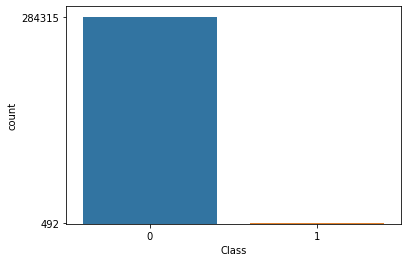

In [10]:
#visulize 
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [11]:
fraud_per=492/284807*100
print(f"fraud_precentage:{fraud_per}")

fraud_precentage:0.1727485630620034


<b>Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.</b>

In [12]:
#check how much average amount withdra during fraud transaction
fraud=df[df["Class"]==1]
valid=df[df["Class"]==0]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#check how much average amount withdra during valid transaction
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

 <b>the average Money transaction for the fraudulent ones is more as compared to valid transction.</b>

In [14]:
#check correlation of features with target here (Class)
# 0.5 to 1 means good positive correlation
#-0.5 to -1 means good negative correlation
df.corr() #inbuilt method

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

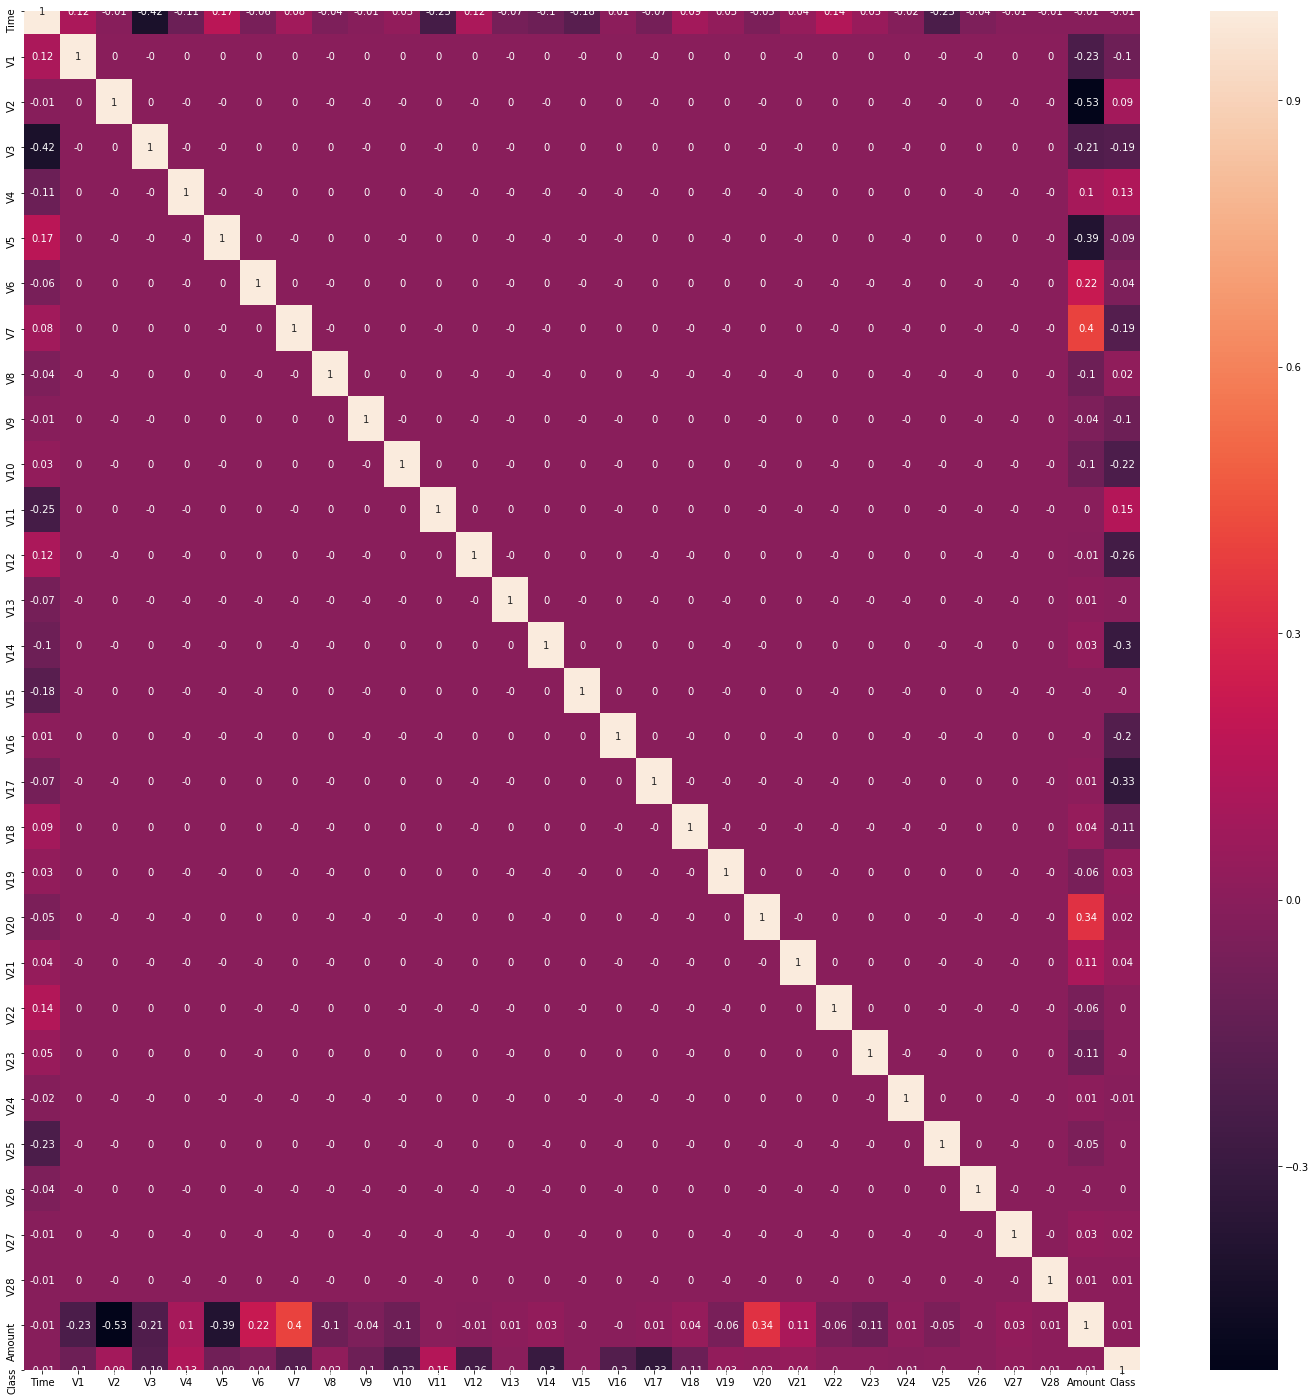

In [15]:
#visulise
plt.figure(figsize=(25,25))
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

### In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other
### V2 and V5 are highly negatively correlated with the feature called Amount. We also see some positive correlation with V7,V20 and Amount

In [16]:
#correlation between Amount and V2 iS -0.53 good negative corr
#correlation between Amount and V5 iS -0.39 negative corr
#correlation between Amount and V7 iS 0.4 positive corr
#correlation between Amount and V20 iS 0.34 positive corr



In [17]:
#separate Independent variable(input variable) X and dependent variable 
#Y(target/output)
X=df.drop("Class",axis=1) #to store all inputs hold in X variable apart from
#deposit
Y=df["Class"]

In [18]:
#Split our dataset in train test of 70% & 30%
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=1)

In [19]:
#create function so we can train our model with different diffirent algorithm to get best of it
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print("Confusion_matrix:")
    print(confusion_matrix(Y_test,Y_pred))
    return model


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression


In [21]:
#first train the model with basic algorithm LogisticRegression
#create object of LogisticRegression
lr=LogisticRegression()

#call function
lr=create_model(lr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.62      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85273    35]
 [   51    84]]


In [22]:
#now we use RandomForestClassifier which better than simple decision tree
from sklearn.ensemble import RandomForestClassifier

In [23]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=45,max_features=4,random_state=1)
#n_estimators number of 45 and max_features=4
#it create 45 decision tree with this 5 feature and take average of it to predict model


In [24]:
#call function
create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.76      0.83       135

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85298    10]
 [   32   103]]


RandomForestClassifier(max_features=4, n_estimators=45, random_state=1)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=30)

In [26]:
create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.67      0.21      0.33       135

    accuracy                           1.00     85443
   macro avg       0.84      0.61      0.66     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85294    14]
 [  106    29]]


GradientBoostingClassifier(n_estimators=30)

In [27]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=30,reg_alpha=1)
#reg_alpha =1 it is
#automatic handle overfitting situation alpha or lambda means hyperparameter
#and handle the outlier automatic
#n_estimators=100 means no. of iterations can be <=100


In [28]:
create_model(xgb)

[18:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.92      0.79      0.85       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85299     9]
 [   29   106]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## by using extream boost classifier we get good F1 score as comapred to other model without balancing the dataset


## now we first balance the dataset and then train the model
### for balancing dataset we need imblearn package but currently we dont have access to this package 
### so further model training we do on googlecolab


In [29]:
#Here No : Majority class   and yes : Minority class  means data is imbalance
#so we have to balance the output variable
# to Balance the target variable then used sampling technique : -
#There are 2 types of sampling technique : -
# 1. Random Under Sampling
# 2. Random over sampling

In [30]:
#First install imblearn  inbuilt package of python but not installed in juypter notebook
#we install the package imblearn  for sampling technique
#!pip install imblearn

In [31]:
#!pip install imblearn

<b>If you have basically reducing the majority class that is known as Under sampling and if you are increasing the minority class that is known as over sampling</b>

In [32]:
#If you have basically reducing the majority class that is known as Under sampling 
from imblearn.under_sampling import RandomUnderSampler

In [33]:
#if converts majority class to minority class  then use RandomUnderSampler 
#Here in this dataset : Majority class : No  and Minority class : Yes
#create object of  RandomUnderSampler() class
rus=RandomUnderSampler()

In [34]:
#we have target : 70% : Y_train means training data and 30# : Y_test means testing data
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [35]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train,Y_sample_train = rus.fit_resample(X_train,Y_train) 

In [36]:
#check 
pd.Series(Y_sample_train).value_counts()

1    357
0    357
Name: Class, dtype: int64

In [37]:
#Testing data 30% 
pd.Series(Y_test).value_counts() #this is unbalance 

0    85308
1      135
Name: Class, dtype: int64

In [38]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass testing data
#we have X_test and Y_test (70%)
X_sample_test,Y_sample_test = rus.fit_resample(X_test,Y_test) 

In [39]:
#Testing data 30% 
pd.Series(Y_sample_test).value_counts() #this is unbalance 

1    135
0    135
Name: Class, dtype: int64

In [40]:
#we train the model with the help og Logistic regression after apply randomundersampler
#we create the object of Logistic Regression class
lr=LogisticRegression()

In [41]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model1(model):
    model.fit(X_sample_train,Y_sample_train)#we train the model
    y_pred=model.predict(X_sample_test) #test
    print(classification_report(Y_sample_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_sample_test,y_pred))
    return model

In [42]:

#call function
create_model1(lr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       135
           1       0.96      0.89      0.92       135

    accuracy                           0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270

Confusion Matrix : 
[[130   5]
 [ 15 120]]


LogisticRegression()

In [43]:
#Apply decisionTreeClassifier : this is select algorithm of classification ,Its help to select imp
#features to predict the o/p , not done manually data analysis to slect imp features
from sklearn.tree import DecisionTreeClassifier

In [44]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=6) #by default gini index method to select imp features

#call function create_model1
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       135
           1       0.95      0.88      0.92       135

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270

Confusion Matrix : 
[[129   6]
 [ 16 119]]


In [45]:

dt1.feature_importances_ # to show reduction of all input features

array([0.        , 0.        , 0.0093842 , 0.        , 0.04753932,
       0.        , 0.        , 0.        , 0.01164935, 0.        ,
       0.00529315, 0.        , 0.01461612, 0.0100822 , 0.80207499,
       0.        , 0.00907398, 0.        , 0.        , 0.01080235,
       0.04812545, 0.        , 0.        , 0.00731719, 0.        ,
       0.        , 0.        , 0.        , 0.00864188, 0.01539983])

In [46]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [47]:
#create object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=75,max_features=5,random_state=1)#here n_estimators is a parameter
#which show no. of decisiontree (how many decisiontree) and max_features means max imp input select
X.shape

(284807, 30)

In [48]:

#call function
create_model1(rfc)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       135
           1       0.98      0.88      0.93       135

    accuracy                           0.93       270
   macro avg       0.94      0.93      0.93       270
weighted avg       0.94      0.93      0.93       270

Confusion Matrix : 
[[133   2]
 [ 16 119]]


RandomForestClassifier(max_features=5, n_estimators=75, random_state=1)

In [49]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=100) #no. of iterations <=100 use algo. decisiontreeclassifier

create_model1(gbc)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       135
           1       0.96      0.90      0.93       135

    accuracy                           0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270

Confusion Matrix : 
[[130   5]
 [ 14 121]]


GradientBoostingClassifier()

In [50]:
#create the object of XGBClassifier class
xgb=XGBClassifier(n_estimators=100,reg_alpha=1) #reg_alpha=1 means automatic handle overfitting situation and
#outlier 

In [51]:
#call function
create_model1(xgb)

[18:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       135
           1       0.98      0.90      0.94       135

    accuracy                           0.94       270
   macro avg       0.95      0.94      0.94       270
weighted avg       0.95      0.94      0.94       270

Confusion Matrix : 
[[133   2]
 [ 13 122]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
#Random Over Sampling : - we increase the minority class means creates the duplicate rows of yes class (minority)
#class and equal to majority class means no class 
#If we are increasing the minority class that is known as over sampling .
#call class inbuilt class RandomOverSampling : - define in imblearn package 

from imblearn.over_sampling import RandomOverSampler

In [53]:
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [54]:
#fit_sample() inbuilt function which define RandomOverSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train1,Y_sample_train1 = ros.fit_resample(X_train,Y_train) 

In [55]:
#check 
pd.Series(Y_sample_train1).value_counts()

1    199007
0    199007
Name: Class, dtype: int64

In [56]:
#Testing data 30% 
pd.Series(Y_test).value_counts() #this is unbalance 

0    85308
1      135
Name: Class, dtype: int64

In [57]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass testing data
#we have X_test and Y_test (70%)
X_sample_test1,Y_sample_test1 = ros.fit_resample(X_test,Y_test) 

In [58]:
#Testing data 30% 
pd.Series(Y_sample_test1).value_counts() 

1    85308
0    85308
Name: Class, dtype: int64

In [59]:
#user defined function create
def create_model2(model):
    model.fit(X_sample_train1,Y_sample_train1)#we train the model
    y_pred=model.predict(X_sample_test1) #test
    print(classification_report(Y_sample_test1,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_sample_test1,y_pred))
    return model

In [60]:
#we train the model with the help og Logistic regression after apply randomOverrsampler
#we create the object of Logistic Regression class
#Use base line model of classification algorithm : Logistic Regression
lr1=LogisticRegression()

In [61]:
#call function
create_model2(lr1)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     85308
           1       0.96      0.84      0.90     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

Confusion Matrix : 
[[81999  3309]
 [13379 71929]]


LogisticRegression()

In [62]:
#create the object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier() #by default gini index method to select imp features
#call function
create_model2(dt2)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     85308
           1       1.00      0.67      0.80     85308

    accuracy                           0.84    170616
   macro avg       0.88      0.84      0.83    170616
weighted avg       0.88      0.84      0.83    170616

Confusion Matrix : 
[[85270    38]
 [27983 57325]]


DecisionTreeClassifier()

In [63]:
#create the object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(max_depth=5) #by default gini index method to select imp features
#call function
create_model2(dt3)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix : 
[[84721   587]
 [14557 70751]]


DecisionTreeClassifier(max_depth=5)

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
#create the object of AdaBoostClassifier 
ada=AdaBoostClassifier(n_estimators=10) #n_estimators=100 : this is parameter (it is used for iteration)
#we define 100 , can be <=100 ,adaboost creates a decisionstump(decisiontree)

In [66]:
#call function
create_model2(ada)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.90      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix : 
[[81925  3383]
 [ 8275 77033]]


AdaBoostClassifier(n_estimators=10)

In [67]:
#create the object of GradientBoostingClassifier class
gbc1=GradientBoostingClassifier(n_estimators=30) #no. of iterations <=100 use algo. decisiontreeclassifier

In [68]:
#call function
create_model2(gbc1)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix : 
[[84441   867]
 [11429 73879]]


GradientBoostingClassifier(n_estimators=30)

In [69]:
#create the object of XGBClassifier class
xgb1=XGBClassifier(n_estimators=25,reg_alpha=1) #reg_alpha=1 means automatic handle overfitting situation and
#outlier 

#call function
create_model2(xgb1)

[18:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix : 
[[85251    57]
 [16513 68795]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:

#use SVM : support vector machine : - classification algorithm
#1. Linear kernel function of SVM : means suppose data are linearly separatable with the help of 
#straight line 
#call class LinearSVC inbuilt class
from sklearn.svm import LinearSVC

In [71]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) #hard marging
#call fun
create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.70      0.14      0.23       135

    accuracy                           1.00     85443
   macro avg       0.85      0.57      0.62     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85300     8]
 [  116    19]]


LinearSVC(random_state=1)

In [72]:
#call fun
create_model1(svc)

              precision    recall  f1-score   support

           0       1.00      0.05      0.10       135
           1       0.51      1.00      0.68       135

    accuracy                           0.53       270
   macro avg       0.76      0.53      0.39       270
weighted avg       0.76      0.53      0.39       270

Confusion Matrix : 
[[  7 128]
 [  0 135]]


LinearSVC(random_state=1)

In [73]:
#call fun
create_model2(svc)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     85308
           1       0.99      0.75      0.85     85308

    accuracy                           0.87    170616
   macro avg       0.89      0.87      0.87    170616
weighted avg       0.89      0.87      0.87    170616

Confusion Matrix : 
[[84614   694]
 [21410 63898]]


LinearSVC(random_state=1)

In [74]:
#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.3)#here C is parameter which is used to
#add some error on training time

In [75]:
#call fun
#training model without balancing dataset
create_model(svc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.16      0.27       135

    accuracy                           1.00     85443
   macro avg       0.85      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85299     9]
 [  113    22]]


LinearSVC(C=0.3, random_state=1)

In [76]:
#call fun
#training model by applying  randomundersampling

create_model1(svc1)

              precision    recall  f1-score   support

           0       1.00      0.05      0.10       135
           1       0.51      1.00      0.68       135

    accuracy                           0.53       270
   macro avg       0.76      0.53      0.39       270
weighted avg       0.76      0.53      0.39       270

Confusion Matrix : 
[[  7 128]
 [  0 135]]


LinearSVC(C=0.3, random_state=1)

In [77]:
#call fun
#training model by applying  randomoversampling

create_model2(svc1)

              precision    recall  f1-score   support

           0       0.97      0.22      0.35     85308
           1       0.56      0.99      0.72     85308

    accuracy                           0.60    170616
   macro avg       0.76      0.60      0.53    170616
weighted avg       0.76      0.60      0.53    170616

Confusion Matrix : 
[[18464 66844]
 [  624 84684]]


LinearSVC(C=0.3, random_state=1)

In [78]:
#2. polynomial Kernel function 
from sklearn.svm import SVC 
#SVC inbuilt class for non-linear data

In [79]:
#create object of SVC class(for polynomial)
poly_svc=SVC(random_state=1,kernel="poly")

In [80]:
#call function
#training model without balancing dataset
create_model(poly_svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.00      0.00      0.00       135

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85308     0]
 [  135     0]]


SVC(kernel='poly', random_state=1)

In [81]:
#call function
#training model by applying  randomundersampling

create_model1(poly_svc)

              precision    recall  f1-score   support

           0       0.53      0.30      0.39       135
           1       0.51      0.73      0.60       135

    accuracy                           0.52       270
   macro avg       0.52      0.52      0.50       270
weighted avg       0.52      0.52      0.50       270

Confusion Matrix : 
[[41 94]
 [36 99]]


SVC(kernel='poly', random_state=1)